# Анализ оттока клиентов банка «Метанпром»

В последнее время в банке наблюдается драматический отток клиентов, что стало серьезной проблемой и угрожает его существованию. Для решения этой проблемы менеджер из отдела маркетинга обратился в отдел аналитики с запросом на выделение однородных сегментов отточных клиентов, которые будут характеризоваться высоким уровнем оттока и охватывать максимальное количество проблемных зон банка.

**Цель проекта:** 

Проанализировать клиентов регионального банка и выделите сегменты клиентов, которые склонны уходить из банка:
- провести исследовательский анализ данных, определить все значимые признаки отточности (интервалы значений характеристик, которые связаны с повышенным оттоком, сравнить портреты типичных клиентов, которые склонны и не склонны уходить из банка и т.д);
- сформулировать и проверить статистические гипотезы:
    - проверить гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались;
    - сформулировать и проверить статистическую гипотезу относительно представленных данных, которая поможет внести ясность в исследование.
- объединяя признаки отточности, сформировать сегменты, отобрать из них лучшие и дать по ним рекомендации.

**Описание данных**: 

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Структура `bank_scrooge.csv`:
- `userid` — идентификатор пользователя;
- `score` — баллы кредитного скоринга;
- `city` — город;
- `gender` — пол;
- `age` — возраст;
- `equity` — приблизительная оценка собственности клиента (от 0 до 9);
- `balance` — баланс на счёте;
- `products` — количество продуктов, которыми пользуется клиент;
- `credit_card` — есть ли кредитная карта (1 - да, 0 - нет);
- `last_activity` — активный клиент (1 - да, 0 - нет);
- `est_salary` — заработная плата клиента;
- `churn` — ушёл или нет (1 - да, 0 - нет).

## Материалы:

Презентация: https://disk.yandex.ru/i/P7t3VpAMNyIDdw

Дашборд: https://public.tableau.com/app/profile/din.gaffarov/viz/_16881481023360/Dashboard1

## Откроем файлы с данными и изучим общую информацию

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import itertools
from scipy import stats as st
import phik
from phik import phik_matrix

#настройка формата вывода чисел с плавающей точкой
pd.options.display.float_format = '{:.3f}'.format
import warnings
# не показываем предупреждения
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.display.max_colwidth = 130

In [2]:
try:
    df = pd.read_csv('/datasets/bank_scrooge.csv')
except:
    df = pd.read_csv('https://*****/datasets/bank_scrooge.csv')

In [3]:
#напишем функцию для изучения датафрейма
def review(df):
    display(df),
    df.info(),
    print('*'*50),
    print(f'Количество явных дубликатов: {df.duplicated().sum()}'),
    print(f'Доля явных дубликатов: {(df.duplicated().sum() / df.shape[0]):.2%}'), 
    print('*'*50),
    print('Статистическая информация о столбцах:'),
    print(df.describe())

In [4]:
review(df)

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.000,Рыбинск,Ж,25.000,1,59214.820,2,0,1,75719.140,1
1,146556,861.000,Рыбинск,Ж,37.000,5,850594.330,3,1,0,86621.770,0
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,107683.340,0
3,225363,866.000,Ярославль,Ж,51.000,5,1524746.260,2,0,1,174423.530,1
4,157978,730.000,Ярославль,М,34.000,5,174.000,1,1,0,67353.160,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.000,Рыбинск,М,27.000,1,78144.650,1,0,1,18943.640,0
9996,139170,894.000,Ярославль,М,46.000,0,NaN,1,1,0,196898.290,0
9997,115639,903.000,Ярославль,М,24.000,0,NaN,2,1,1,108905.090,0
9998,148700,777.000,Ярославль,Ж,68.000,3,865457.970,3,0,1,86874.900,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB
**************************************************
Количество явных дубликатов: 0
Доля явных дубликатов: 0.00%
**************************************************
Статистическая информация о столбцах:
          US

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- 10000 строк и 12 столбцов для исследования;
- проблемы c названиями столбцов;  
- не во всех столбцах типы данных соответствуют сохраненным в них значениям;    
- явных дубликатов нет;
- обнаружены пропуски.

##  Предобработка данных

Приведем названия столбцов к нижнему регистру:

In [5]:
df.columns = df.columns.str.lower()

### Исследуем пропуски:

In [6]:
pd.concat(
          [df.isna().sum(), df.isna().sum() / len(df) * 100], 
          axis=1, 
          keys=['Пропуски', '% от всех данных']
         )

,Пропуски,% от всех данных
userid,0,0.000
score,0,0.000
city,0,0.000
gender,0,0.000
age,26,0.260
equity,0,0.000
balance,2295,22.950
products,0,0.000
credit_card,0,0.000
last_activity,0,0.000


Пропусков в столбце `age` 26 строк, что составляет 0.26% от всех данных, посмотрим на них:

In [7]:
df[df['age'].isna()]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1247,228075,932.000,Ярославль,М,NaN,5,7601719.200,2,1,1,408121.160,0
2165,187635,692.000,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.820,0
2444,221156,913.000,Ярославль,М,NaN,0,NaN,1,1,1,135693.240,0
3091,138660,836.000,Ростов,Ж,NaN,5,294315.530,2,0,1,63310.220,1
4912,210674,834.000,Рыбинск,М,NaN,1,238330.520,2,0,1,93775.060,0
5470,218868,827.000,Рыбинск,Ж,NaN,4,448959.070,2,1,1,67835.950,0
5495,151662,884.000,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.770,0
7236,210135,908.000,Рыбинск,Ж,NaN,4,1120340.310,3,1,1,85002.150,0
7248,219343,920.000,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.670,0
7345,184913,829.000,Ярославль,Ж,NaN,3,188648.770,2,0,1,75206.900,0


Удалим их, т.к. логически их нечем заменить, пропусков `age` не много, они не отразятся на исследовании:

In [8]:
df.dropna(subset=['age'], inplace=True)

Посмотрим на пропуски в столбце `balance`:

In [9]:
df[df['balance'].isna()].head(20)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.000,Рыбинск,Ж,30.000,0,NaN,1,1,1,107683.340,0
9,133130,906.000,Ярославль,Ж,67.000,0,NaN,1,0,1,238055.530,0
10,148929,927.000,Ростов,М,52.000,0,NaN,1,1,1,196820.070,0
11,172184,921.000,Ростов,М,41.000,0,NaN,1,1,1,217469.480,0
19,127034,922.000,Рыбинск,Ж,53.000,0,NaN,1,0,0,147094.820,0
21,177415,896.000,Рыбинск,Ж,47.000,0,NaN,1,0,0,225060.350,0
30,155730,946.000,Ярославль,Ж,47.000,0,NaN,2,1,1,660015.850,0
34,205226,944.000,Ярославль,М,35.000,0,NaN,2,1,1,239843.390,0
39,173175,924.000,Рыбинск,Ж,51.000,0,NaN,1,1,1,248844.470,0
43,228585,956.000,Ростов,М,41.000,0,NaN,1,1,0,115117.100,0


На первый взгляд бросается, что оттока у таких клиентов нет, посмотрим ближе:

In [10]:
df[df['balance'].isna()]['churn'].value_counts(normalize=True) * 100

0   99.430
1    0.570
Name: churn, dtype: float64

Действительно, у клиентов с неизвестным балансом, отток клиентов меньше процента.

Посмотрим столбец `equity` у этих клиентов:

In [11]:
df[df['balance'].isna()]['equity'].value_counts(normalize=True) * 100

0   94.954
1    5.002
3    0.044
Name: equity, dtype: float64

У ~95% клиентов нулевая приблизительная оценка собственности, у остальных 5% оценка 1 из 9, что очень подозрительно, медианная оценка по датафрейму 3 из 9. Нужно узнать, как считается `equity`, если от баланса, тогда понятно почему у ~95% стоит 0.

Пропуски в `equity` занимают 22.95% от всех данных, просто удалить их будет не правильно. Ещё можно посчитать среднее соотношение заработной платы и баланса у других клиентов, чтобы заменить ими пропуски, но думаю, пока что можно оставить как есть.


### Изменим тип данных в столбцах

In [12]:
df['score'] = df['score'].astype('int')
df['age'] = df['age'].astype('int') 

### Поищем аномалии

#### Проверим все ли `userid` в нашем датафрейме уникальны:

In [13]:
df['userid'].duplicated().sum()

50

Мы обнаружели 50 дубликатов. Идентификатор пользователя должен быть уникальным, посмотрим на эти дубли:

In [14]:
(
    df[df.duplicated(subset=['userid'], keep=False)]
     .sort_values('userid')
     .head(20)
)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883,Рыбинск,Ж,55,1,362756.490,3,0,1,175920.480,1
7694,116540,887,Ярославль,Ж,38,0,NaN,1,0,1,119247.610,0
4866,117943,855,Рыбинск,Ж,32,6,1036832.930,4,1,1,107792.710,1
7542,117943,880,Ярославль,Ж,40,0,NaN,1,1,0,137718.930,0
5863,120258,908,Рыбинск,Ж,38,4,2213581.630,2,0,1,160327.770,1
5896,120258,905,Ярославль,М,30,0,NaN,1,1,1,146427.960,0
1411,123461,829,Ярославль,Ж,59,0,96222.440,2,0,1,102771.550,1
8638,123461,934,Рыбинск,М,34,0,NaN,2,1,0,291619.270,0
9775,124450,758,Рыбинск,Ж,36,0,73574.070,2,0,1,79963.590,0
8164,124450,859,Ярославль,Ж,38,6,516811.200,1,1,1,95144.630,1


Пользователи разные, а вот идентификаторы почему то дублируются. Видим отличие по городам, проверим, дублируются ли пользователи по идентификатору и городу:

In [15]:
df[df.duplicated(subset=['userid', 'city'], keep=False)]

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn


Дублей не обнаружено, судя по всему в банках разных городов идентификатор пользователя может быть одинаковым, что не есть хорошо, нужно сообщить об этом заказчику.


#### Проверим количество продуктов, которыми пользуется клиент:

In [16]:
df['products'].value_counts()

2    5119
1    3323
3    1038
4     474
5      19
0       1
Name: products, dtype: int64

In [17]:
df.query('products < 1')

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
8957,147837,962,Рыбинск,Ж,79,3,NaN,0,0,0,25063.960,1


Нашёлся один клиент, у которого 0 продуктов, таких данных быть не должно, удалим эту строчку:

In [18]:
df.drop(df[df['products'] == 0].index, inplace=True)

#### Изучим баланс клиентов:

Статистическая информация о столбце "balance":


count        7695.000
mean       827245.588
std       1980327.410
min             0.000
25%        295698.715
50%        524295.330
75%        980051.215
max     119113552.010
Name: balance, dtype: float64

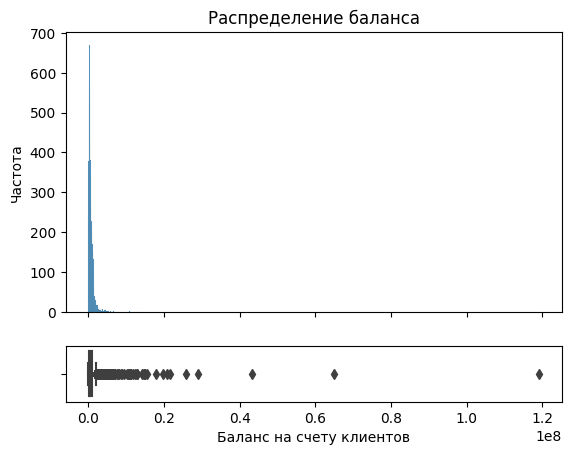

In [19]:
print('Статистическая информация о столбце "balance":')
display(df['balance'].describe())
#создаем фигуру с двумя графиками, которые будут размещены друг на друге
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1, 0.2)})

#создаем гистограмму распределения баланса
sns.histplot(df['balance'], ax=axs[0])
#создаем ящики с усами, которые показывают статистические характеристики 
#(медиану, квартили, выбросы) распределения баланса
sns.boxplot(df['balance'], ax=axs[1], fliersize=5.5)

#устанавливаем заголовок и подпись оси x и y
axs[0].set_title('Распределение баланса')
axs[0].set_ylabel('Частота')
plt.xlabel('Баланс на счету клиентов');

Посмотрим на выбросы, всё что выше 99 перцентиля:

In [20]:
df_balance_99per = df[(df['balance'] >= df['balance'].quantile(0.99))]

display(df_balance_99per.describe())
display(df_balance_99per)

print(f'{len(df_balance_99per)} клиентов, баланс которых \
от {df_balance_99per.balance.min()} до {df_balance_99per.balance.max()} у.е., \
что превышает 99 перцентиль и составляет {round(len(df_balance_99per) / len(df) * 100, 2)}% \
от всех данных.')

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000
mean,178905.753,947.766,44.922,4.299,11641580.987,2.247,0.481,0.623,606025.831,0.351
std,36725.032,36.323,10.676,0.974,15313168.037,0.830,0.503,0.488,342682.775,0.480
min,114087.000,837.000,30.000,2.000,4827453.820,1.000,0.000,0.000,21765.760,0.000
25%,152512.000,925.000,35.000,4.000,5718315.000,2.000,0.000,0.000,321591.880,0.000
50%,183699.000,954.000,42.000,4.000,6749773.070,2.000,0.000,1.000,544420.410,0.000
75%,210662.000,975.000,54.000,5.000,11834882.670,3.000,1.000,1.000,905356.580,1.000
max,228821.000,1000.000,66.000,8.000,119113552.010,4.000,1.000,1.000,1395064.450,1.000


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
107,134358,985,Рыбинск,Ж,41,4,6749773.070,2,1,0,698013.270,0
125,227092,1000,Ярославль,М,32,5,19757180.850,2,1,1,1024626.500,0
143,198181,958,Ярославль,М,34,3,5763239.760,2,1,1,920730.060,1
248,180899,930,Ярославль,М,32,4,5527695.020,3,0,1,360963.150,0
324,221077,925,Ярославль,Ж,51,5,5049319.160,3,0,1,224310.010,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8936,215126,914,Ярославль,М,39,4,7004446.610,3,0,1,891360.400,0
9082,159669,987,Ярославль,М,42,5,6071920.690,2,0,0,419911.640,0
9103,123965,939,Ярославль,М,34,5,9346657.080,1,1,1,1263028.490,1
9142,223934,969,Ярославль,М,39,3,14802129.740,1,1,0,766076.100,0


77 клиентов, баланс которых от 4827453.82 до 119113552.01 у.е., что превышает 99 перцентиль и составляет 0.77% от всех данных.


Таких клиентов не много, их даже нельзя выделить отдельным сегментом, по теории ЦПТ, нам нужно исследовать данные, где сосредоточено большинство клиентов, отбросив их, мы получим распределение получше:

Статистическая информация о столбце "balance":


count      7618.000
mean     717938.181
std      653797.754
min           0.000
25%      293648.008
50%      517035.840
75%      961274.797
max     4827195.670
Name: balance, dtype: float64

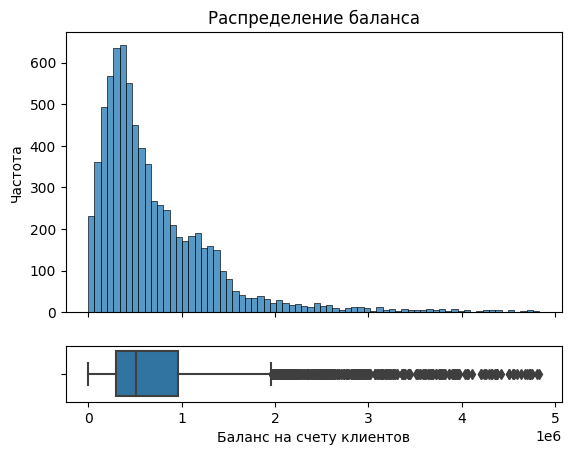

In [21]:
df = df[(df['balance'] <= df['balance'].quantile(0.99)) | (df['balance'].isna())]

print('Статистическая информация о столбце "balance":')
display(df['balance'].describe())
#создаем фигуру с двумя графиками, которые будут размещены друг на друге
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1, 0.2)})

#создаем гистограмму распределения баланса
sns.histplot(df['balance'], ax=axs[0])
#создаем ящики с усами, которые показывают статистические характеристики 
#(медиану, квартили, выбросы) распределения баланса
sns.boxplot(df['balance'], ax=axs[1], fliersize=5.5)

#устанавливаем заголовок и подпись оси x и y
axs[0].set_title('Распределение баланса')
axs[0].set_ylabel('Частота')
plt.xlabel('Баланс на счету клиентов');

#### Изучим заработную плату клиентов:

Статистическая информация о столбце "est_salary":


count      9896.000
mean     144233.689
std      130396.547
min        2546.300
25%       74945.583
50%      119005.340
75%      173181.798
max     1363549.520
Name: est_salary, dtype: float64

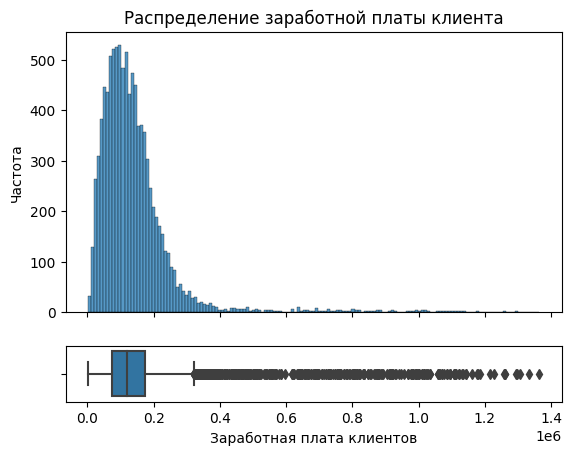

In [22]:
print('Статистическая информация о столбце "est_salary":')
display(df['est_salary'].describe())
#создаем фигуру с двумя графиками, которые будут размещены друг на друге
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1, 0.2)})

#создаем гистограмму распределение заработной платы клиента
sns.histplot(df['est_salary'], ax=axs[0])
#создаем ящики с усами, которые показывают статистические характеристики 
#(медиану, квартили, выбросы) распределения заработной платы клиента
sns.boxplot(df['est_salary'], ax=axs[1], fliersize=5.5)

#устанавливаем заголовок и подпись оси x и y
axs[0].set_title('Распределение заработной платы клиента')
axs[0].set_ylabel('Частота')
plt.xlabel('Заработная плата клиентов');

Посмотрим на выбросы, всё что выше 400 тыс.:

In [23]:
df_est_salary_400 = df[(df['est_salary'] > 400000)]

display(df_est_salary_400.describe())
display(df_est_salary_400)

print(f'{len(df_est_salary_400)} клиентов, баланс которых \
от {df_est_salary_400.est_salary.min()} до {df_est_salary_400.est_salary.max()} у.е., \
что составляет {round(len(df_est_salary_400) / len(df) * 100, 2)}% от всех данных.')

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,286.000,286.000,286.000,286.000,70.000,286.000,286.000,286.000,286.000,286.000
mean,168417.035,867.217,42.689,1.087,2366762.236,1.469,0.783,0.573,740867.915,0.108
std,33244.675,93.391,11.415,1.915,1491749.772,0.747,0.413,0.495,239288.684,0.311
min,97550.000,686.000,24.000,0.000,143665.440,1.000,0.000,0.000,400670.120,0.000
25%,142550.500,764.250,34.000,0.000,1075535.292,1.000,1.000,0.000,515719.540,0.000
50%,165723.500,913.000,40.000,0.000,2049784.585,1.000,1.000,1.000,711981.040,0.000
75%,195120.500,939.000,49.750,1.000,3806478.055,2.000,1.000,1.000,918317.788,0.000
max,228876.000,993.000,80.000,6.000,4827195.670,4.000,1.000,1.000,1363549.520,1.000


,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
30,155730,946,Ярославль,Ж,47,0,NaN,2,1,1,660015.850,0
44,210313,935,Ярославль,М,41,5,3781118.220,2,1,0,761349.200,0
124,192966,686,Рыбинск,Ж,33,0,NaN,1,1,1,518488.590,0
137,163907,761,Ярославль,М,31,0,NaN,1,1,0,999177.170,0
138,173386,915,Ярославль,Ж,48,0,NaN,2,0,0,800733.720,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9813,123334,713,Ярославль,М,58,0,NaN,2,1,1,1060562.130,0
9862,102186,913,Ярославль,М,48,4,4203148.670,4,1,1,917628.110,0
9908,211089,993,Рыбинск,М,38,6,4542980.700,1,1,1,491609.130,1
9964,148232,968,Ярославль,Ж,32,0,NaN,1,1,0,520631.220,0


286 клиентов, баланс которых от 400670.12 до 1363549.52 у.е., что составляет 2.89% от всех данных.


Эти клиенты сильно выделяются от общей массы, думаю их можно сбросить:

Статистическая информация о столбце "est_salary":


count     9610.000
mean    126477.457
std      70004.707
min       2546.300
25%      73835.012
50%     116488.545
75%     167537.253
max     399043.430
Name: est_salary, dtype: float64

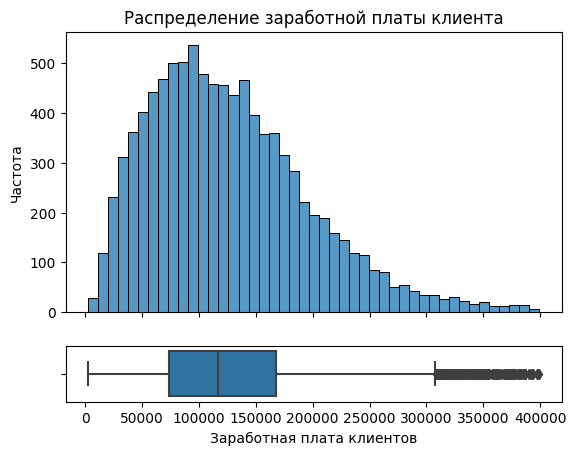

In [24]:
df = df[(df['est_salary'] < 400000)]

print('Статистическая информация о столбце "est_salary":')
display(df['est_salary'].describe())
#создаем фигуру с двумя графиками, которые будут размещены друг на друге
fig, axs = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (1, 0.2)})

#создаем гистограмму распределение заработной платы клиента
sns.histplot(df['est_salary'], ax=axs[0])
#создаем ящики с усами, которые показывают статистические характеристики 
#(медиану, квартили, выбросы) распределения заработной платы клиента
sns.boxplot(df['est_salary'], ax=axs[1], fliersize=5.5)

#устанавливаем заголовок и подпись оси x и y
axs[0].set_title('Распределение заработной платы клиента')
axs[0].set_ylabel('Частота')
plt.xlabel('Заработная плата клиентов');

#### Посмотрим размер датафрейма, после проделанных операций:

In [25]:
df.shape

(9610, 12)

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- изменили названия столбцов;
- изменили типы данных в столбцах, в соответствии сохранённым в них значениям;
- избавились от пропусков, где это возможно;
- удалили выбросы в столбцах `balance` и `est_salary`;
- для дальнейшего анализа у нас осталось 9610 клиентов.

## Анализ данных

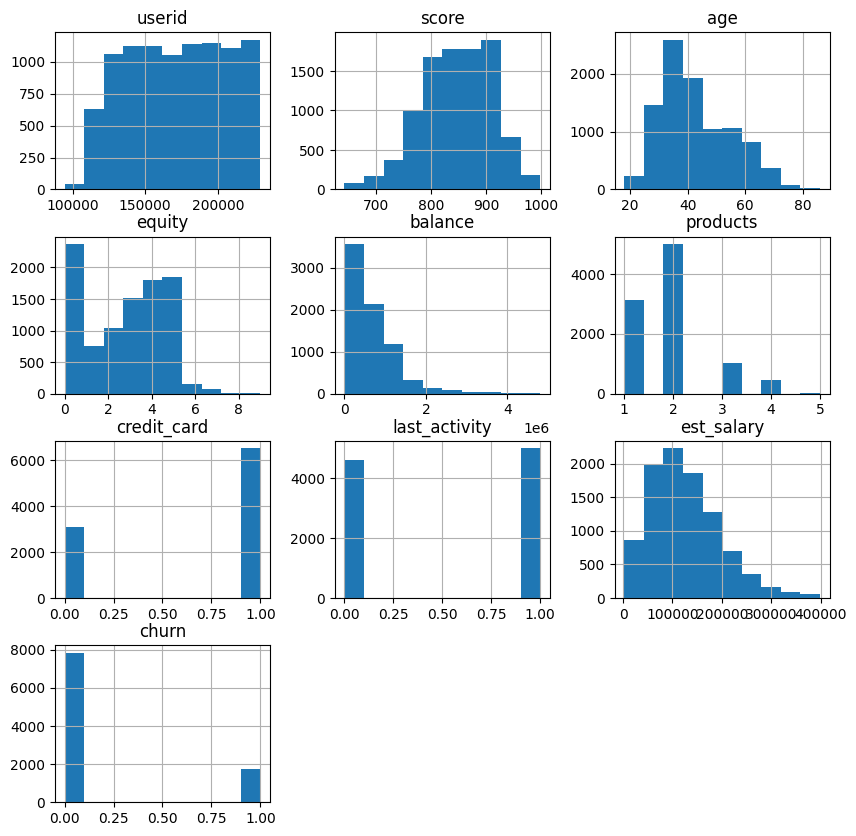

In [26]:
df.hist(figsize=(10,10));

0    7850
1    1760
Name: churn, dtype: int64


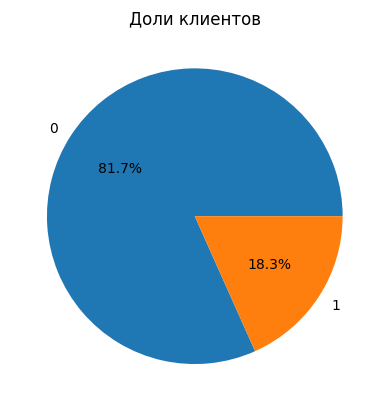

In [27]:
print(df.churn.value_counts())
plt.pie(df.churn.value_counts(), 
        labels=df.churn.value_counts().index, 
        autopct='%1.1f%%')
plt.title("Доли клиентов");

Ушли 1760 клиента, что составляет 18.3%, разберемся, что их объединяет.

### Исследуем корреляции

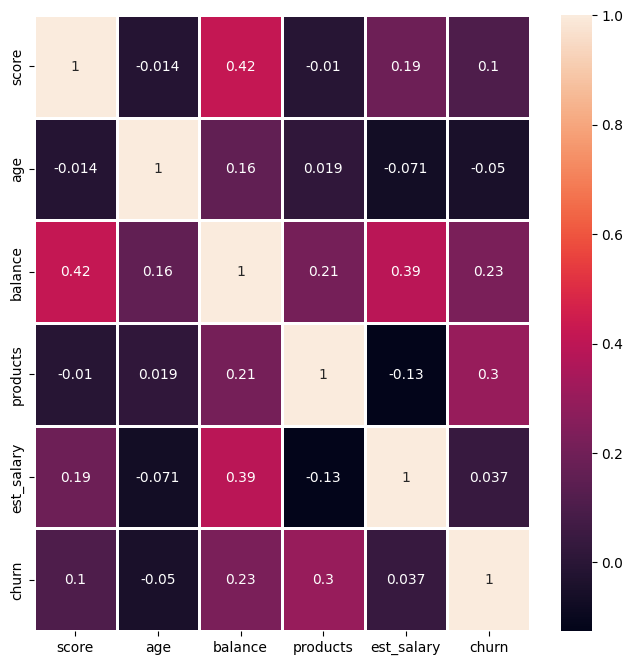

In [28]:
df_corr = df[['score', 'age', 'balance', 'products', 'est_salary', 'churn']].corr()

plt.figure(figsize=(8, 8))
sns.heatmap(df_corr, annot=True, linewidths=1);

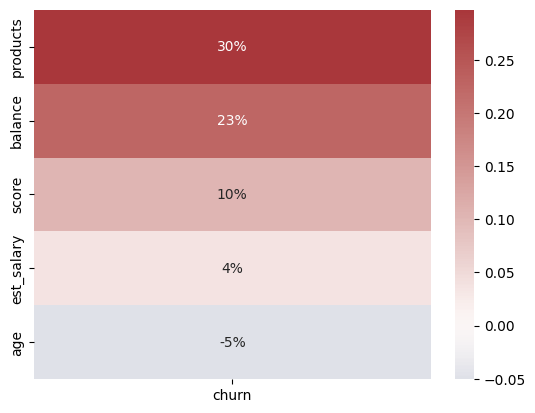

In [29]:
sns.heatmap(
    df_corr.loc[:, ['churn']].drop(['churn']).sort_values('churn', ascending=False),
    annot=True, fmt=".0%", cmap="vlag", center=0
);

Отток клиентов больше всего коррелирует с:
- `products`, положительная корреляция, чем больше продуктов, которыми пользуется клиент, тем больше отток;
- `balance`, положительная корреляция, чем больше баланс клиента, тем больше отток.

В нашу корреляцию Пирсона не попали столбцы `city`, `gender`, `equity`, `credit_card` и `last_activity`. Для исследования корреляций с категориальными признаками используем статистический тест, коэффициент Хи-квадрат:

In [30]:
from scipy.stats import chi2_contingency

cat_columns = ['city', 'gender', 'equity', 'credit_card', 'last_activity']
for column in cat_columns:
    contingency_table = pd.crosstab(df[column], df['churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    print(f'Столбец: {column}')
    print(f'Статистика Хи-квадрат: {chi2}')
    print(f'p-значение: {p_value}\n')

Столбец: city
Статистика Хи-квадрат: 8.884917574989348
p-значение: 0.011766970441399856

Столбец: gender
Статистика Хи-квадрат: 193.91303677007886
p-значение: 4.4488131799007583e-44

Столбец: equity
Статистика Хи-квадрат: 661.6899838267644
p-значение: 1.1843829235091811e-136

Столбец: credit_card
Статистика Хи-квадрат: 158.83802388948072
p-значение: 2.0301668661661377e-36

Столбец: last_activity
Статистика Хи-квадрат: 266.51655918378094
p-значение: 6.518204115493502e-60



Более высокое значение статистики Хи-квадрат указывает на более сильную связь между переменными, таким образом на отток влияет всё, но меньше всего город.

Посмотрим корреляцию Phik:

interval columns not set, guessing: ['score', 'age', 'equity', 'balance', 'products', 'credit_card', 'last_activity', 'est_salary', 'churn']


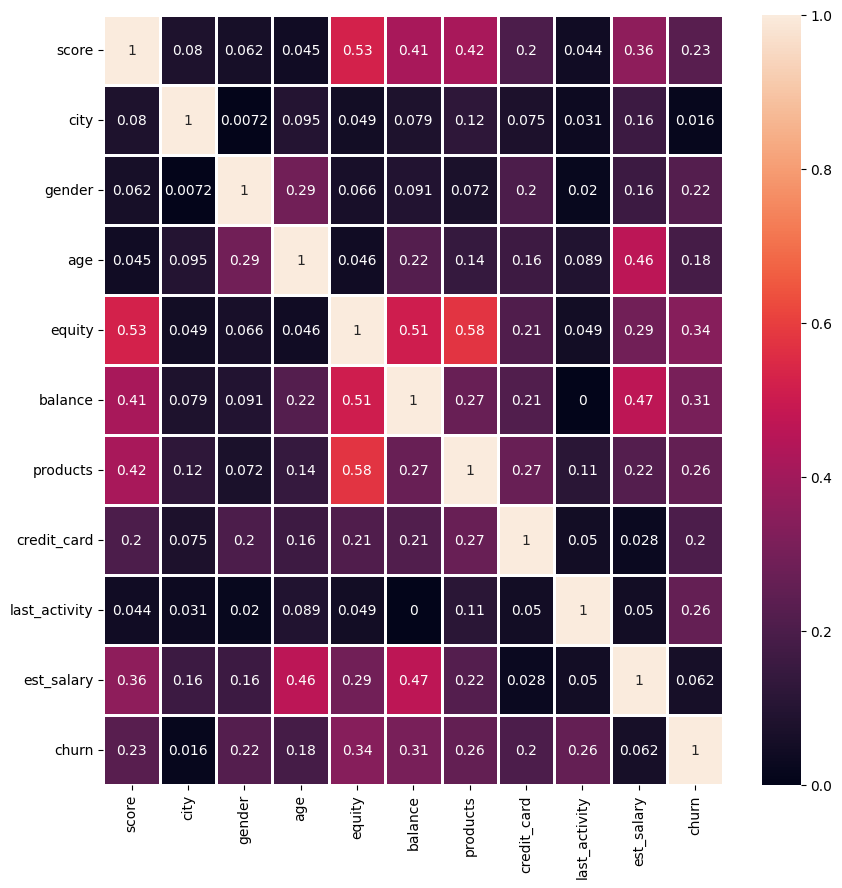

In [31]:
phik_corr_matrix = df.iloc[:, 1:].phik_matrix()

plt.figure(figsize=(10, 10))
sns.heatmap(phik_corr_matrix, annot=True, linewidths=1);

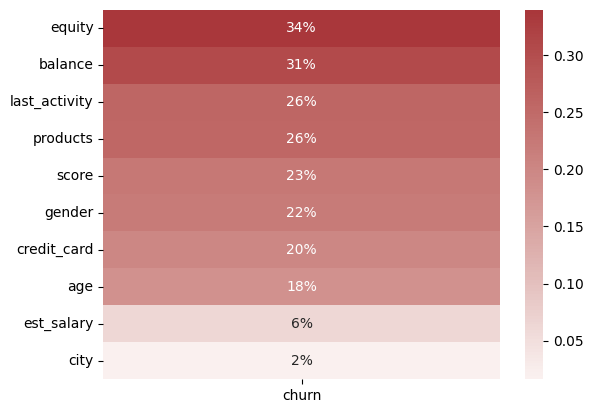

In [32]:
sns.heatmap(
    phik_corr_matrix.loc[:, ['churn']].drop(['churn']).sort_values('churn', ascending=False),
    annot=True, fmt=".0%", cmap="vlag", center=0
);

Отток клиентов больше всего коррелирует с:
- `equity`;
- `balance`;
- `last_activity`;
- `products`;
- `score`;
- `gender`;
- `credit_card`.

### Определим признаки, влияющие на отток клиентов, изучим все столбцы

#### `score` - баллы кредитного скоринга клиента

,churn,Количество клиентов,Cредний балл,Медианный балл,% от всех данных
0,0,7850,844.183,846.000,81.700
1,1,1760,861.341,865.000,18.300


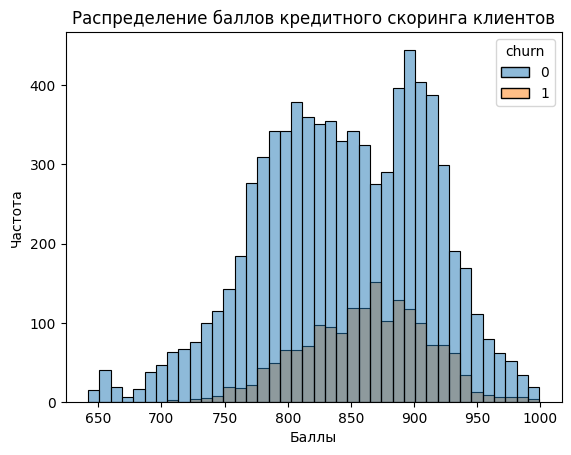

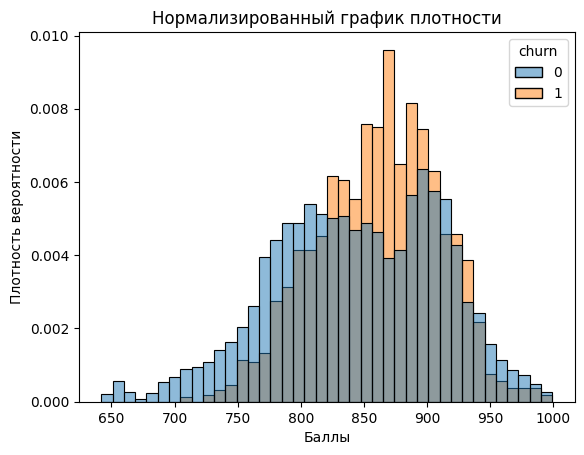

In [33]:
df_score = (df.groupby(['churn'])['score']
   .agg(['count', 'mean', 'median'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредний балл',
                  'median': 'Медианный балл'
                  })
)
df_score['% от всех данных'] = round(df_score['Количество клиентов'] 
                                         / df_score['Количество клиентов'].sum() * 100, 1)

display(df_score.sort_values(by=['Количество клиентов'], ascending=False))

sns.histplot(data=df, hue='churn',
             x='score',
             palette='tab10'
             );
plt.xlabel('Баллы')
plt.ylabel('Частота')
plt.title('Распределение баллов кредитного скоринга клиентов')
plt.show()

sns.histplot(data=df, hue='churn',
             x='score',
             stat='density',
             common_norm=False,
             palette='tab10'
             );
plt.xlabel('Баллы')
plt.ylabel('Плотность вероятности')
plt.title('Нормализированный график плотности')
plt.show()

Разница среднего и медианного балла кредитного скоринга незначительна, заметна различие размаха, так же, видим что у ушедших клиентов нормальное распределение, с одной модой, а у оставшихся 2 моды. Далее проведем статистическую проверку, для пониманя, влияет это на отток или нет. На первый взгляд уходят клиенты с хорошим средним баллом.

Можно выделить признак:
- score >= 820 and score <= 950

#### `city` - город клиента

,city,Количество клиентов,Cредний отток,% от всех данных
2,Ярославль,5600,0.191,58.300
1,Рыбинск,2607,0.164,27.100
0,Ростов,1403,0.185,14.600


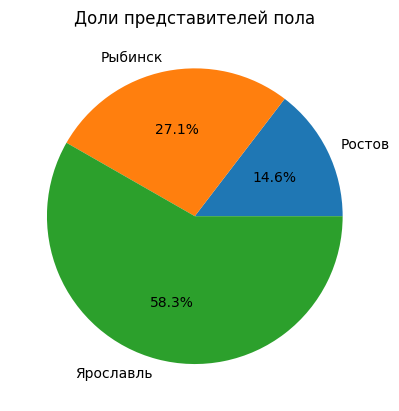

In [34]:
df_city = (df.groupby(['city'])['churn']
   .agg(['count', 'mean'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредний отток'
                  })
)
df_city['% от всех данных'] = round(df_city['Количество клиентов'] 
                                         / df_city['Количество клиентов'].sum() * 100, 1)
display(df_city.sort_values(by=['Количество клиентов'], ascending=False))

plt.pie(df_city['Количество клиентов'], labels=df_city.city, autopct='%1.1f%%')
plt.title("Доли представителей пола");

Разница среднего незначительна, город меньше всего влияет на отток.

#### `gender` - пол клиента

,gender,Количество клиентов,Cредний отток,% от всех данных
0,Ж,4835,0.128,50.300
1,М,4775,0.239,49.700


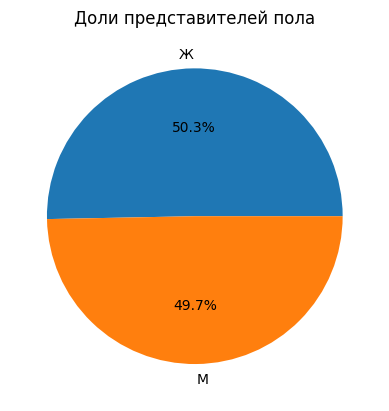

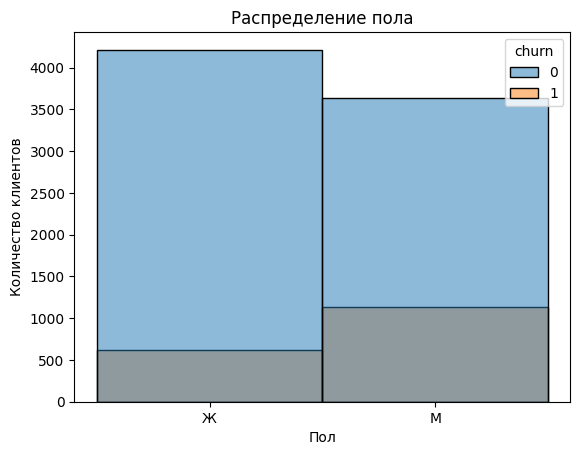

In [35]:
df_gender = (df.groupby(['gender'])['churn']
   .agg(['count', 'mean'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредний отток'
                  })
)
df_gender['% от всех данных'] = round(df_gender['Количество клиентов'] 
                                         / df_gender['Количество клиентов'].sum() * 100, 1)
display(df_gender.sort_values(by=['Количество клиентов'], ascending=False))

plt.pie(df_gender['Количество клиентов'], labels=df_gender.gender, autopct='%1.1f%%')
plt.title("Доли представителей пола");
plt.show()

sns.histplot(data=df, hue='churn',
             x='gender',
             palette='tab10'
             );
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.title('Распределение пола')
plt.show()

Средний отток клиентов мужского пола в ~2 раза больше, чем женского.

Можно выделить признак:
- gender == "М"

#### `age` - возраст клиента

,age,Количество клиентов,Cредний отток
18,36,403,0.144
19,37,388,0.186
15,33,381,0.189
14,32,366,0.202
17,35,366,0.189
16,34,364,0.231
20,38,320,0.184
21,39,315,0.171
22,40,312,0.138
13,31,307,0.195


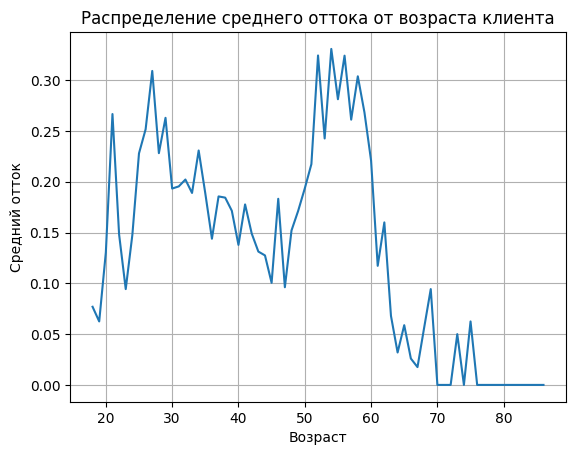

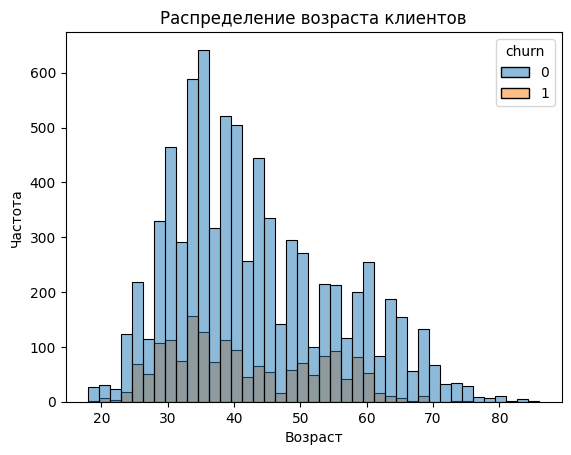

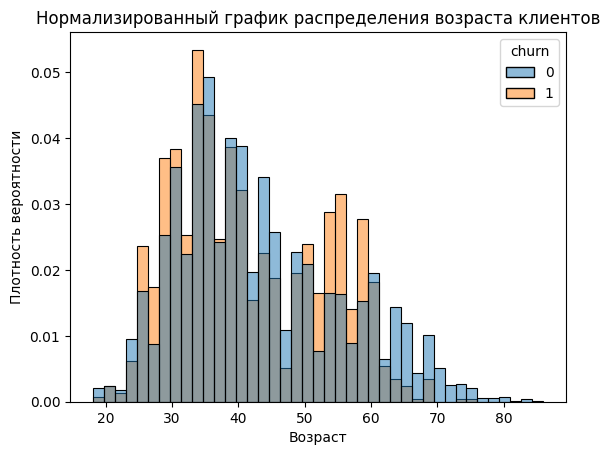

In [36]:
df_age = (df.groupby(['age'])['churn']
   .agg(['count', 'mean'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредний отток'
                  })
)

display(df_age.sort_values(by=['Количество клиентов'], ascending=False).head(20))


plt.plot(df_age['age'], df_age['Cредний отток'])
plt.grid()
plt.title('Распределение среднего оттока от возраста клиента')
plt.xlabel('Возраст')
plt.ylabel('Средний отток')
plt.show()

sns.histplot(data=df, hue='churn',
             x='age',
             palette='tab10'
             );
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.title('Распределение возраста клиентов')
plt.show()

sns.histplot(data=df, hue='churn',
             x='age',
             stat='density',
             common_norm=False,
             palette='tab10'
             );
plt.xlabel('Возраст')
plt.ylabel('Плотность вероятности')
plt.title('Нормализированный график распределения возраста клиентов')
plt.show()

Высокий уровень оттока у клиентов возраста 25-35 и 50-60 лет.

#### `equity` - приблизительная оценка собственности клиента (от 0 до 9)

,equity,Количество клиентов,Cредний отток
0,0,2371,0.037
1,1,761,0.122
2,2,1043,0.159
3,3,1519,0.206
4,4,1804,0.250
5,5,1847,0.296
6,6,157,0.350
7,7,79,0.456
8,8,16,0.375
9,9,13,0.538


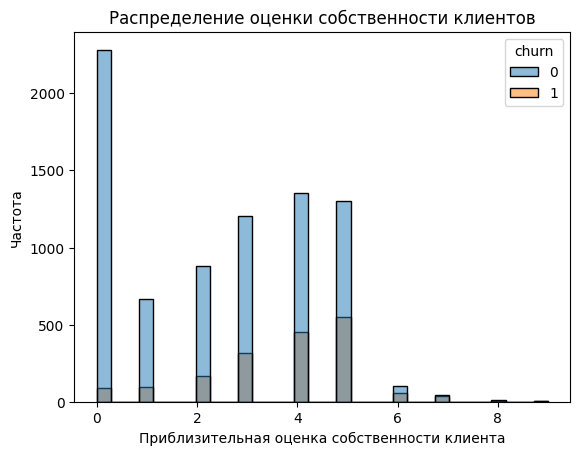

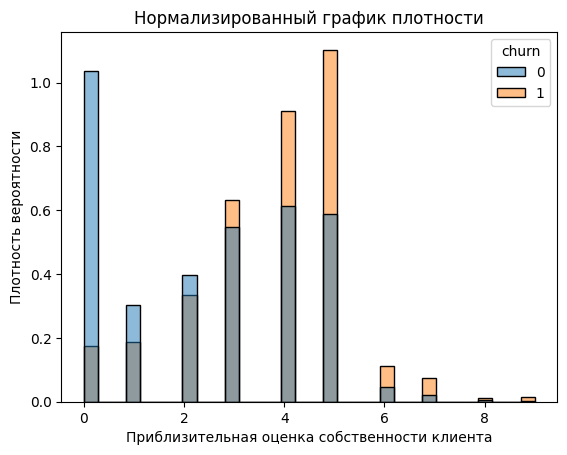

In [37]:
df_equity = (df.groupby(['equity'])['churn']
   .agg(['count', 'mean'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредний отток',
                  })
)

display(df_equity)

sns.histplot(data=df, hue='churn',
             x='equity',
             palette='tab10'
             );
plt.xlabel('Приблизительная оценка собственности клиента')
plt.ylabel('Частота')
plt.title('Распределение оценки собственности клиентов')
plt.show()

sns.histplot(data=df, hue='churn',
             x='equity',
             stat='density',
             common_norm=False,
             palette='tab10'
             );
plt.xlabel('Приблизительная оценка собственности клиента')
plt.ylabel('Плотность вероятности')
plt.title('Нормализированный график плотности')
plt.show()

Видим выбросы на значении 0, как мы помним раньше, это клиенты у которых неизвестный баланс, посмотрим, что будет без них:

,equity,Количество клиентов,Cредний отток
0,0,411,0.190
1,1,659,0.141
2,2,1043,0.159
3,3,1519,0.206
4,4,1804,0.250
5,5,1847,0.296
6,6,157,0.350
7,7,79,0.456
8,8,16,0.375
9,9,13,0.538


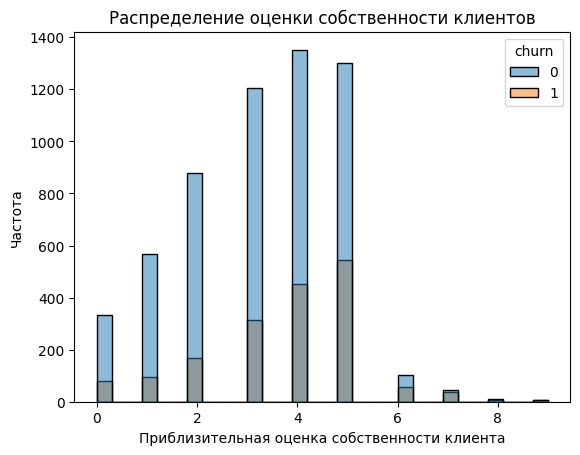

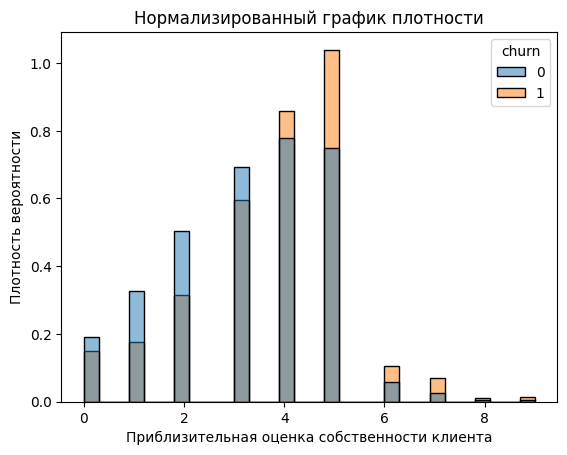

In [38]:
df_equity = (df.query('balance >= 0').groupby(['equity'])['churn']
   .agg(['count', 'mean'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредний отток',
                  })
)

display(df_equity)

sns.histplot(data=df.query('balance >= 0'), hue='churn',
             x='equity',
             palette='tab10'
             );
plt.xlabel('Приблизительная оценка собственности клиента')
plt.ylabel('Частота')
plt.title('Распределение оценки собственности клиентов')
plt.show()

sns.histplot(data=df.query('balance >= 0'), hue='churn',
             x='equity',
             stat='density',
             common_norm=False,
             palette='tab10'
             );
plt.xlabel('Приблизительная оценка собственности клиента')
plt.ylabel('Плотность вероятности')
plt.title('Нормализированный график плотности')
plt.show()

Странно, что оценка обрывается на 5, возможно в банке некоректная работа распределения.

Посмотрим на линейный график распределения:

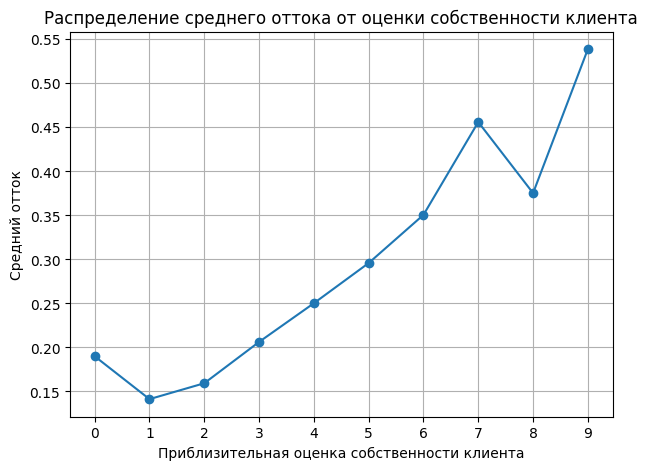

In [39]:
plt.figure(figsize=(7, 5))
plt.plot(df_equity['equity'], df_equity['Cредний отток'], marker='o')
plt.grid()
plt.title('Распределение среднего оттока от оценки собственности клиента')
plt.xlabel('Приблизительная оценка собственности клиента')
plt.ylabel('Средний отток')
plt.xticks(range(len(df_equity['equity'])), df_equity['equity'])
plt.show()

Чем выше приблизительная оценка собственности клиента, тем выше шанс оттока клиента.

Можно выделить признак:
- equity != [1, 2]

#### `balance` - баланс на счёте клиента

,churn,Количество клиентов,Cредний баланс,Медианный баланс
0,0,5797,625505.500,469773.410
1,1,1751,958037.876,765016.670


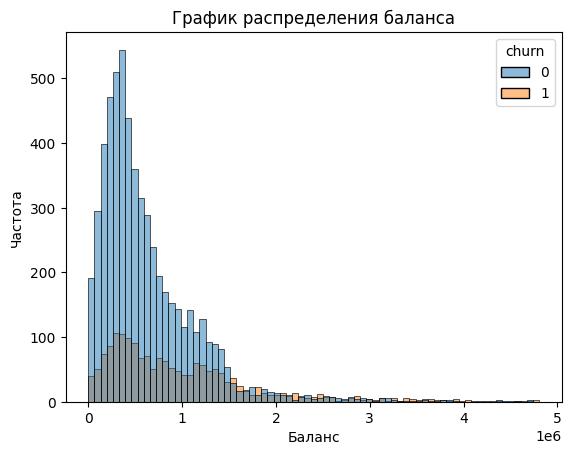

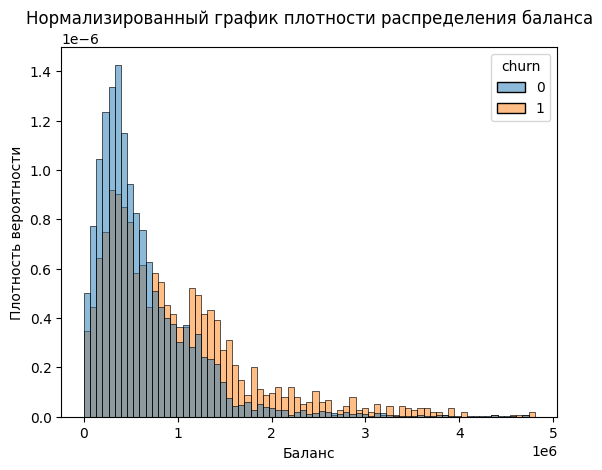

In [40]:
df_balance = (df.groupby(['churn'])['balance']
   .agg(['count', 'mean', 'median'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредний баланс',
                  'median': 'Медианный баланс'
                  })
)

display(df_balance.sort_values(by=['Количество клиентов'], ascending=False))

sns.histplot(data=df, hue='churn',
             x='balance',
             palette='tab10'
             );
plt.xlabel('Баланс')
plt.ylabel('Частота')
plt.title('График распределения баланса')
plt.show()

sns.histplot(data=df, hue='churn',
             x='balance',
             stat='density',
             common_norm=False,
             palette='tab10'
             );
plt.xlabel('Баланс')
plt.ylabel('Плотность вероятности')
plt.title('Нормализированный график плотности распределения баланса')
plt.show()

Средний и медианный баланс ушедших клиентов был выше, чем у не ушедших.

Можно выделить признак:
- balance > 600000

#### `products` - количество продуктов, которыми пользуется клиент;

,products,Количество клиентов,Cредний отток
1,2,4999,0.190
0,1,3126,0.072
2,3,1010,0.287
3,4,456,0.629
4,5,19,0.421


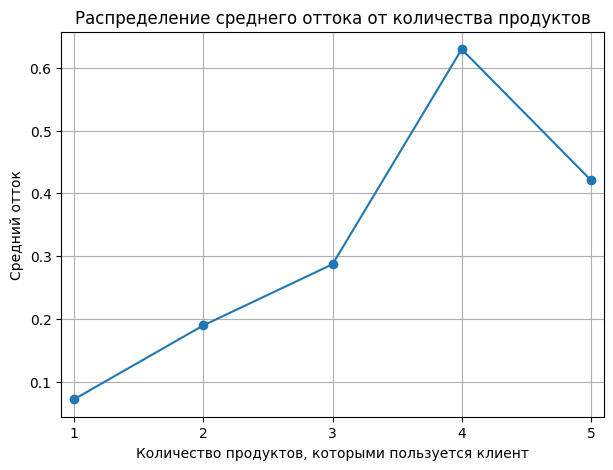

In [41]:
df_products = (df.groupby(['products'])['churn']
   .agg(['count', 'mean'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредний отток',
                  })
)

display(df_products.sort_values(by=['Количество клиентов'], ascending=False))

plt.figure(figsize=(7, 5))
plt.plot(df_products['products'], df_products['Cредний отток'], marker='o')
plt.grid()
plt.title('Распределение среднего оттока от количества продуктов')
plt.xlabel('Количество продуктов, которыми пользуется клиент')
plt.ylabel('Средний отток')
plt.xticks(range(6))
plt.xlim(0.9, 5.1)
plt.show()

Чем больше количество продуктов, которыми пользуется клиент, тем выше шанс оттока.

Можно выделить признак:
- products > 1

#### `credit_card` - есть ли кредитная карта (1 - да, 0 - нет)

,credit_card,churn,Количество клиентов,% от всех данных
2,1,0,5552,57.800
0,0,0,2298,23.900
3,1,1,971,10.100
1,0,1,789,8.200


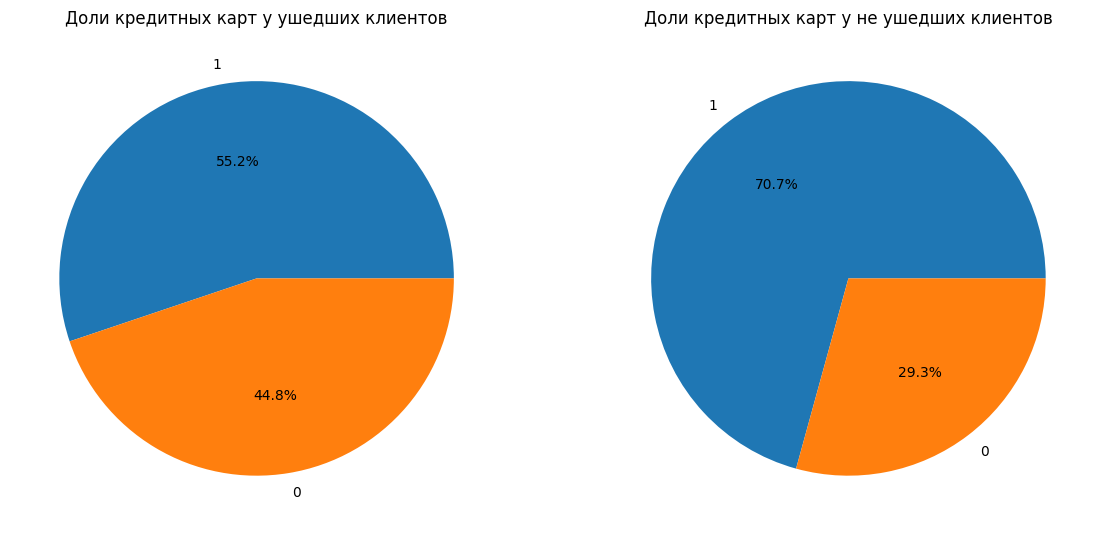

In [42]:
df_credit_card = (df.groupby(['credit_card', 'churn']).userid.count()
           .reset_index()
           .sort_values(by='userid', ascending=False)
           .rename(columns={'userid': 'Количество клиентов'})
          )
df_credit_card['% от всех данных'] = round(df_credit_card['Количество клиентов'] 
                                         / df_credit_card['Количество клиентов'].sum() * 100, 1)
display(df_credit_card)

# создаем первый график
plt.figure(figsize=(14, 7))
df_for_plot = df_credit_card.query('churn == 1')
plt.subplot(1, 2, 1)
plt.pie(df_for_plot['Количество клиентов'], labels=df_for_plot.credit_card, autopct='%1.1f%%');
plt.title("Доли кредитных карт у ушедших клиентов");

# создаем второй график
df_for_plot = df_credit_card.query('churn == 0')
plt.subplot(1, 2, 2)
plt.pie(df_for_plot['Количество клиентов'], labels=df_for_plot.credit_card, autopct='%1.1f%%');
plt.title("Доли кредитных карт у не ушедших клиентов");

plt.show()

In [43]:
df_credit_card = (df.groupby(['credit_card'])['churn']
   .agg(['count', 'mean'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредний отток',
                  }))
df_credit_card

,credit_card,Количество клиентов,Cредний отток
0,0,3087,0.256
1,1,6523,0.149


Среди клиентов, которые не пользовались кредитными картами, отток клиентов выше.
44.8% ушедших клиентов не пользовались кредитными картами.

Можно выделить признак:
- credit_card == 0

#### `last_activity` - был ли клиент активен последнее время (1 - да, 0 - нет)

,last_activity,churn,Количество клиентов,% от всех данных
0,0,0,4073,42.400
2,1,0,3777,39.300
3,1,1,1226,12.800
1,0,1,534,5.600


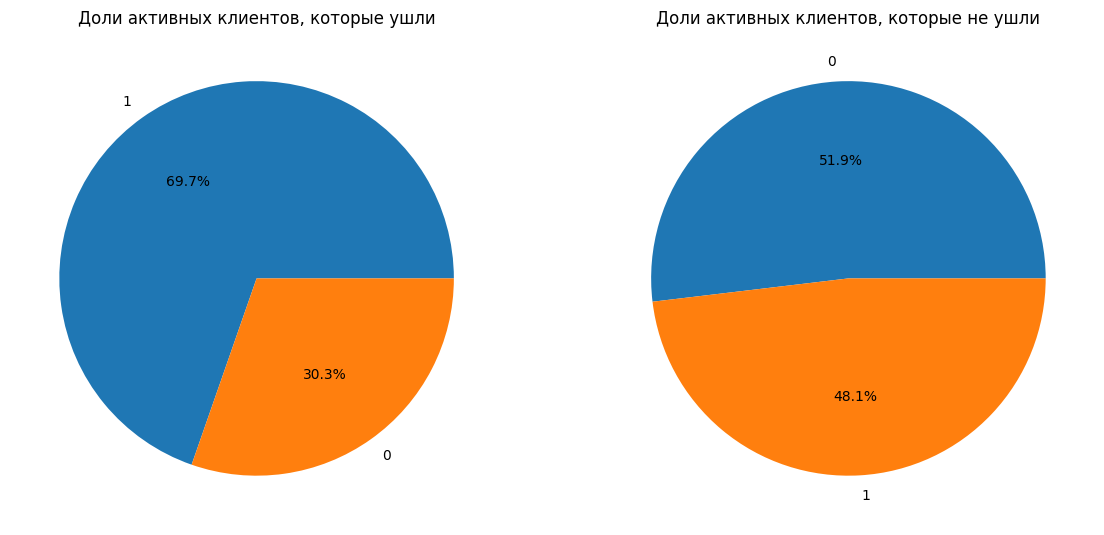

In [44]:
df_last_activity = (df.groupby(['last_activity', 'churn']).userid.count()
           .reset_index()
           .sort_values(by='userid', ascending=False)
           .rename(columns={'userid': 'Количество клиентов'})
          )
df_last_activity['% от всех данных'] = round(df_last_activity['Количество клиентов'] 
                                         / df_last_activity['Количество клиентов'].sum() * 100, 1)
display(df_last_activity)

# создаем первый график
plt.figure(figsize=(14, 7))
df_for_plot = df_last_activity.query('churn == 1')
plt.subplot(1, 2, 1)
plt.pie(df_for_plot['Количество клиентов'], labels=df_for_plot.last_activity, autopct='%1.1f%%');
plt.title("Доли активных клиентов, которые ушли");

# создаем второй график
df_for_plot = df_last_activity.query('churn == 0')
plt.subplot(1, 2, 2)
plt.pie(df_for_plot['Количество клиентов'], labels=df_for_plot.last_activity, autopct='%1.1f%%');
plt.title("Доли активных клиентов, которые не ушли");

plt.show()

In [45]:
df_last_activity = (df.groupby(['last_activity'])['churn']
   .agg(['count', 'mean'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредний отток',
                  }))
df_last_activity['% от всех данных'] = round(df_last_activity['Количество клиентов'] 
                                         / df_last_activity['Количество клиентов'].sum() * 100, 1)
df_last_activity

,last_activity,Количество клиентов,Cредний отток,% от всех данных
0,0,4607,0.116,47.900
1,1,5003,0.245,52.100


Средний отток активных клиентов в 2 раза выше, чем у неактивных. 69.7% ушедших клиентов были активными. Такая активность возможна, из-за перемещения средств на счёте перед уходом из банка, нужно спросить у заказчика, как они определяют активность клиента.

Можно выделить признак:
- last_activity == 1

#### `est_salary` - оценочная заработная плата клиента

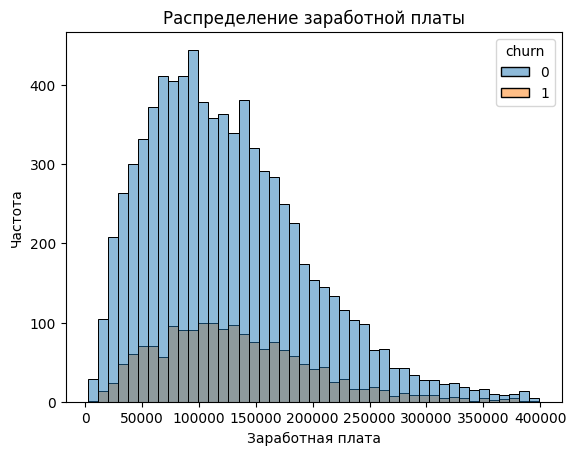

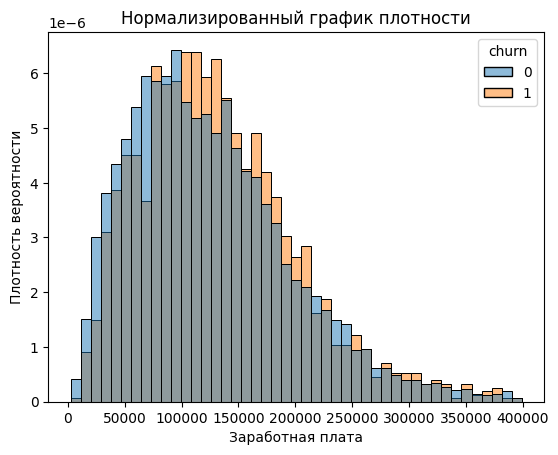

In [46]:
df_est_salary = (df.groupby(['churn'])['est_salary']
   .agg(['count', 'mean', 'median'])
   .reset_index()
   .rename(columns={'count': 'Количество клиентов', 
                  'mean': 'Cредняя з/п',
                  'median': 'Медианная з/п'
                  })
)
df_est_salary['% от всех данных'] = round(df_est_salary['Количество клиентов'] 
                                         / df_est_salary['Количество клиентов'].sum() * 100, 1)
df_est_salary.sort_values(by=['Количество клиентов'], ascending=False)

sns.histplot(data=df, hue='churn',
             x='est_salary',
             palette='tab10'
             );
plt.xlabel('Заработная плата')
plt.ylabel('Частота')
plt.title('Распределение заработной платы')
plt.show()

sns.histplot(data=df, hue='churn',
             x='est_salary',
             stat='density',
             common_norm=False,
             palette='tab10'
             );
plt.xlabel('Заработная плата')
plt.ylabel('Плотность вероятности')
plt.title('Нормализированный график плотности')
plt.show()

На первый взгляд средняя и медианная заработная плата клиента отличается незначительно, нужно провести статистическую проверку, чем займемся далее.

### Составим портрет типичных клиентов, которые склонны  уйти из банка

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- склонны уходить клиенты:
    - кредитный скоринг 825 - 950 баллов;
    - мужского пола;
    - возраста 25-35 и 50-60 лет;
    - с приблизительной оценкой собственности не равный 1-2;
    - с балансом выше 600 тыс.;
    - которые пользуются 2 и более продуктами;
    - без кредитной карты;
    - активные последнее время.

## Проверка статистических гипотез

Напишем функцию для проведения теста:

In [47]:
def stat_test(column):
    # выделим наши выборки в отдельные переменные, очистив их от пропусков
    user_gone = df[df['churn'] == 1][column].dropna()
    user_ok = df[df['churn'] == 0][column].dropna()

    # посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок
    results = st.ttest_ind(user_gone, user_ok, equal_var=False)
    alpha = 0.05

    # Если p-value будет меньше выбранного уровня значимости(alpha = 0.05), 
    # то нулевую гипотезу о равенстве средних отвергнем
    print(results.pvalue)
    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу')
    else:
        print('Не получилось отвергнуть нулевую гипотезу')

### Проверим гипотезу различия `score` между теми клиентами, которые ушли и теми, которые остались

Введем основную и альтернативные гипотезы:
```
H_0: cредний балл кредитного скоринга клиентов (`score`) ушедших и оставшихся одинаковые
H_a: cредний балл кредитного скоринга клиентов (`score`) ушедших и оставшихся разные

```

In [48]:
stat_test('score')

5.389971454555417e-35
Отвергаем нулевую гипотезу


Полученное значение p-value очень мало, с очень малой вероятностью текущее различие между выборками можно получить случайно, значит, вероятнее всего cредние баллы кредитного скоринга клиентов разные.

### Проверим гипотезу различия `est_salary` между теми клиентами, которые ушли и теми, которые остались

Введем основную и альтернативные гипотезы:
```
H_0: cредняя заработная плата клиентов (`est_salary`) ушедших и оставшихся одинаковые
H_a: cредняя заработная плата клиентов (`est_salary`) ушедших и оставшихся разные

```

In [49]:
stat_test('est_salary')

0.00019181446801257358
Отвергаем нулевую гипотезу


Полученное значение p-value очень мало, с очень малой вероятностью текущее различие между выборками можно получить случайно, значит, вероятнее всего заработные платы клиентов разные.

### Проверим гипотезу различия `equity` между теми клиентами, которые ушли и теми, которые остались

Введем основную и альтернативные гипотезы:
```
H_0: cредние приблизительные оценки собственности клиентов (`equity`) ушедших и оставшихся одинаковые
H_a: cредние приблизительные оценки собственности клиентов (`equity`) ушедших и оставшихся разные

```

In [50]:
stat_test('equity')

2.5020047847723695e-175
Отвергаем нулевую гипотезу


Полученное значение p-value очень мало, с очень малой вероятностью текущее различие между выборками можно получить случайно, значит, вероятнее всего cредние приблизительные оценки собственности клиентов разные.

### Проверим гипотезу различия `products` между теми клиентами, которые ушли и теми, которые остались

Введем основную и альтернативные гипотезы:
```
H_0: cреднее количество продуктов, которыми пользуется клиент (`products`) ушедших и оставшихся одинаковые
H_a: cреднее количество продуктов, которыми пользуется клиент (`products`) ушедших и оставшихся разные

```

In [51]:
stat_test('products')

1.9135765301682965e-130
Отвергаем нулевую гипотезу


Полученное значение p-value очень мало, с очень малой вероятностью текущее различие между выборками можно получить случайно, значит, вероятнее всего cредние количество продуктов, которыми пользуются клиенты разные.

### Проверим гипотезу различия `balance` между теми клиентами, которые ушли и теми, которые остались

Введем основную и альтернативные гипотезы:
```
H_0: cреднее значение баланса клиентов (`balance`) ушедших и оставшихся одинаковые
H_a: cреднее значение баланса клиентов (`balance`) ушедших и оставшихся разные

```

In [52]:
stat_test('balance')

1.2941616227482353e-58
Отвергаем нулевую гипотезу


Полученное значение p-value очень мало, с очень малой вероятностью текущее различие между выборками можно получить случайно, значит, вероятнее всего cредние баланс клиентов разные.

<div style="border:solid blue 2px; padding: 20px">
    
**Вывод:**
- на отток клиента вляют:
    - баллы кредитного скоринга;
    - заработная плата клиента
    - приблизительные оценки собственности;
    - количество продуктов, которыми пользуется клиент;
    - баланс на счёте.

## Промежуточный итог о том, какие показатели стратегически влияют на отток

Выделим признаки, где отток клиентов больше:
- `gender` равный "М";
- `products` больше 1;
- `balance` больше 600 тыс.;
- `score` от 820 до 950;
- `last_activity` равный 1;
- `credit_card` равный 0;
- `equity` не равный 1 и 2.

## Сегментация

Средний отток по всем данным:

In [53]:
round(df['churn'].mean(), 2)

0.18

Через query выделим сегменты (от 500 до 2000 клиентов на сегмент), где отток выше чем средний уровень оттока по банку:

In [54]:
# поместим в `var` список с признаками:
var = ['gender == "М"', 
       'products > 1', 
       'balance > 600000', 
       'score >= 820 and score <= 950', 
       'last_activity == 1', 
       'credit_card == 0', 
       'equity != [1, 2]']

# поместим в переменную combinations все комбинации `var`
combinations = []
for r in range(1, len(var) + 1):
    combinations.extend(itertools.combinations(var, r))
    
# удаляем комбинации с 1 переменной
combinations = [c for c in combinations if len(c) > 1]
# заменим запятую на "&"
combinations = [' & '.join(comb) for comb in combinations]

'''
Сделаем срез в `df` с комбинациями, 
создадим датафрейм `segments` в которую положим:
    - комбинацию, 
    - количество клиентов попавшие в срез,
    - средний отток в срезе
'''
results = []
for combination in combinations:
    if 500 < len(df.query(combination)) < 2000:
        average_churn = round(df.query(combination)['churn'].mean(), 4)
        results.append({'Комбинация': combination, 
                        'Размер среза': len(df.query(combination)), 
                        'Средний отток': average_churn})

segments = pd.DataFrame(results)

Посмотрим на получившийся датафрейм:

In [55]:
display(segments.describe())
segments

,Размер среза,Средний отток
count,75.000,75.000
mean,1077.733,0.490
std,393.672,0.087
min,509.000,0.333
25%,719.000,0.420
50%,1046.000,0.466
75%,1374.000,0.556
max,1945.000,0.705


,Комбинация,Размер среза,Средний отток
0,"gender == ""М"" & balance > 600000",1608,0.412
1,"gender == ""М"" & credit_card == 0",1241,0.355
2,balance > 600000 & last_activity == 1,1696,0.441
3,balance > 600000 & credit_card == 0,1395,0.394
4,last_activity == 1 & credit_card == 0,1683,0.350
...,...,...,...
70,"products > 1 & balance > 600000 & score >= 820 and score <= 950 & credit_card == 0 & equity != [1, 2]",1008,0.470
71,"products > 1 & balance > 600000 & last_activity == 1 & credit_card == 0 & equity != [1, 2]",697,0.557
72,"products > 1 & score >= 820 and score <= 950 & last_activity == 1 & credit_card == 0 & equity != [1, 2]",866,0.557
73,"balance > 600000 & score >= 820 and score <= 950 & last_activity == 1 & credit_card == 0 & equity != [1, 2]",564,0.647


У нас получилось:
- 75 сегмента,
- со срезом от 509 до 1945 клиентов,
- средняя оттока ~0.49, что более чем в 2 раза выше среднего оттока по всем данным.

Выделим 10 сегментов по высокому среднему оттоку:

In [56]:
segments.sort_values('Средний отток', ascending=False).head(10)

,Комбинация,Размер среза,Средний отток
61,"gender == ""М"" & products > 1 & balance > 600000 & score >= 820 and score <= 950 & last_activity == 1",509,0.705
39,"gender == ""М"" & balance > 600000 & score >= 820 and score <= 950 & last_activity == 1",578,0.687
67,"gender == ""М"" & balance > 600000 & score >= 820 and score <= 950 & last_activity == 1 & equity != [1, 2]",552,0.687
74,"products > 1 & balance > 600000 & score >= 820 and score <= 950 & last_activity == 1 & credit_card == 0 & equity != [1, 2]",559,0.649
73,"balance > 600000 & score >= 820 and score <= 950 & last_activity == 1 & credit_card == 0 & equity != [1, 2]",564,0.647
68,products > 1 & balance > 600000 & score >= 820 and score <= 950 & last_activity == 1 & credit_card == 0,586,0.642
56,balance > 600000 & score >= 820 and score <= 950 & last_activity == 1 & credit_card == 0,593,0.639
63,"gender == ""М"" & products > 1 & balance > 600000 & last_activity == 1 & equity != [1, 2]",652,0.591
69,"products > 1 & balance > 600000 & score >= 820 and score <= 950 & last_activity == 1 & equity != [1, 2]",1017,0.577
64,"gender == ""М"" & products > 1 & balance > 600000 & credit_card == 0 & equity != [1, 2]",556,0.576


## Выводы и рекомендации

Получив данные, мы изучили их и сделали преодобработку, заменили названия столбцов и изменили типы данных, избавились от пропусков, где это возможно, удалили выбросы в столбцах `balance` и `est_salary`. Для дальнейшего анализа у нас осталось 9610 клиентов, из которых ушли 1760, что составляет 18.3%. 

Проведя исследовательский анализ, мы выяснили, что склонны уходить клиенты с признаками:
- мужского пола;
- кредитный скоринг 825 - 950 баллов;
- с приблизительной оценкой собственности не равный 1-2;
- с балансом выше 600 тыс.;
- которые пользуются 2 и более продуктами;
- без кредитной карты;
- активные в последнее время.

Чтобы выделить сегмент клиентов, мы скомбинировали все варианты признаков, стратегически влияющие на отток, получили 75 комбинаций, где самый высокий отток:
- 1. Размер среза 509 клиентов, средний отток 70,5%:
    - мужский пол;
    - активный клиент;
    - баланс выше 600 тыс.;
    - баллы кредитного скоринга от 820 до 950;
    - количество продуктов, которыми пользуется клиент 2 и выше.
- 2. Размер среза 578 клиентов, средний отток 68,7%:
    - мужский пол;
    - активный клиент;
    - баланс выше 600 тыс.;
    - баллы кредитного скоринга от 820 до 950.
- 3. Размер среза 552 клиентов, средний отток 68,7%:
    - активный клиент;
    - баланс выше 600 тыс.;
    - баллы кредитного скоринга от 820 до 950;
    - количество продуктов, которыми пользуется клиент 2 и выше;
    - приблизительная оценка собственности клиента не равен 1 и 2.
- 4. Размер среза 559 клиентов, средний отток 64,9%:
    - активный клиент;
    - без кредитной карты;
    - баланс выше 600 тыс.;
    - баллы кредитного скоринга от 820 до 950;
    - количество продуктов, которыми пользуется клиент 2 и выше;
    - приблизительная оценка собственности клиента не равен 1 и 2.
- 5. Размер среза 564 клиентов, средний отток 64,7%:
    - активный клиент;
    - без кредитной карты;
    - баланс выше 600 тыс.;
    - баллы кредитного скоринга от 820 до 950;
    - приблизительная оценка собственности клиента не равен 1 и 2.
    
**Рекомендации:**
- предложить персональные предложения или скидки на продукты и услуги;
- уделить больше внимания продвижению и предложению кредитных карт. Разработать программу лояльности для держателей кредитных карт и предложите привлекательные бонусы и вознаграждения;
- более высокие процентные ставки на депозиты или специальные инвестиционные продукты, для клиентов с балансом выше 600 тыс.;
- клиентам с высоким баллом кредитного скоринга, предложить более выгодные условия кредитования;
- предложить улучшенные условия или продукты, которые будут более привлекательны для мужской аудитории.

## Презентация исследования

Презентация: https://disk.yandex.ru/i/P7t3VpAMNyIDdw

##  Дашборд

Выгрузим предобработанный датафрейм в файл `bank_scrooge_clean.csv`:

In [57]:
df.to_csv('bank_scrooge_clean.csv', index=False, encoding='utf-8')

В Tableau Public на основе файла `bank_scrooge_clean.csv` сформируем дашборд:

https://public.tableau.com/app/profile/din.gaffarov/viz/_16881481023360/Dashboard1